# Diwali Sales Data Analysis Using Python 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('Diwali Sales Data.csv',encoding='unicode_escape')
# To avoid unicode error , using 'unicode_escape'

In [3]:
df.shape

(11251, 15)

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
# Drop unnecessary columns / bank columns
df.drop(['Status','unnamed1'],axis = 1,inplace = True)

In [7]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [8]:
# Identifying null values
df.isna().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
# dropping rows with null values
df.dropna(inplace = True)

In [10]:
df.isna().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [11]:
# Changing data type
df['Amount'] = df['Amount'].astype('int')

In [12]:
df['Amount'].dtype

dtype('int32')

In [13]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [14]:
# Renaming a column
df.rename(columns = {'Marital_Status':'Shaadi'}).head()
# Here inplace is False, Therefore no changes will be done in the original DataFrame

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


In [15]:
# describe() method returns description of the data in the DataFrame (i.e, count,mean, std,etc)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [16]:
# Applying describe() to specific columns
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


## Exploratory Data Analysis


### Gender

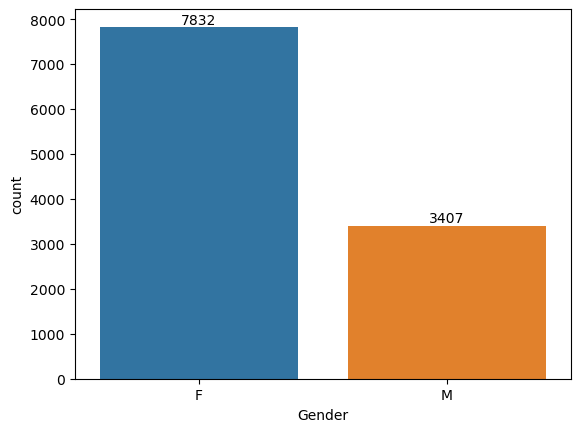

In [17]:
g = sns.countplot(x = 'Gender', data = df)

for cnt in g.containers:
    g.bar_label(cnt)     # Displaying the count value in the chart above rescpective bar graph
    

In [18]:
sales_by_gender = df.groupby(['Gender'])['Amount'].sum().reset_index().sort_values(by = 'Amount', ascending = False)
sales_by_gender

,Gender,Amount
0,F,74335853
1,M,31913276


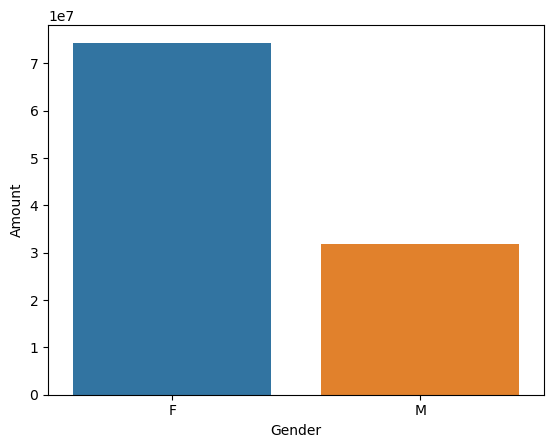

In [19]:
sales = sns.barplot(x = 'Gender', y = 'Amount', data = sales_by_gender)

From the above graph we can clearly see that most of the buyers are females and therefore amount spent by females is more than males.

### Age

In [20]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

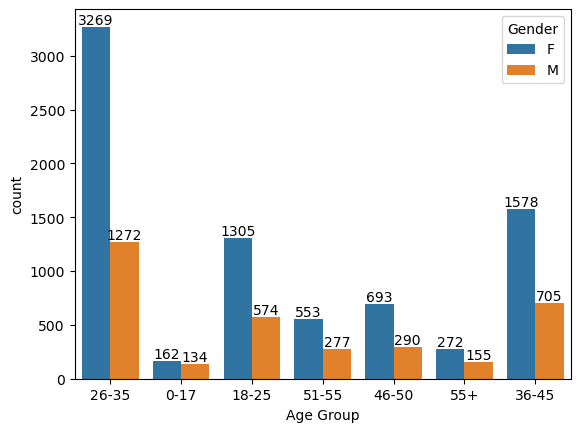

In [21]:
age_grp = sns.countplot(data = df, x = 'Age Group', hue = 'Gender') # hue here createscategories in each age group based on gender

for cnt in age_grp.containers:
    age_grp.bar_label(cnt)

In [22]:
sale_by_age_grp = df.groupby(['Age Group'])['Amount'].sum().reset_index().sort_values(by = 'Amount', ascending = False)
sale_by_age_grp

,Age Group,Amount
2,26-35,42613442
3,36-45,22144994
1,18-25,17240732
4,46-50,9207844
5,51-55,8261477
6,55+,4080987
0,0-17,2699653


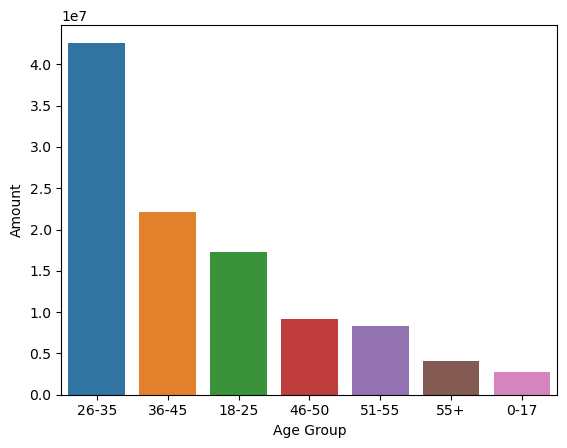

In [23]:
sales_age_grp = sns.barplot(data=sale_by_age_grp,x = 'Age Group', y = 'Amount')

From above graphs we can see that most of the buyers are of age group 26-35 and in that females are majority buyers

### State

In [24]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [25]:
# top 10 states with highest number of orders
orders_per_state = df.groupby(['State'])['Orders'].count().reset_index().sort_values(by = 'Orders', ascending = False).head(10)
orders_per_state


,State,Orders
14,Uttar Pradesh,1944
10,Maharashtra,1525
7,Karnataka,1304
2,Delhi,1104
9,Madhya Pradesh,921
0,Andhra Pradesh,811
5,Himachal Pradesh,608
8,Kerala,453
4,Haryana,452
1,Bihar,434


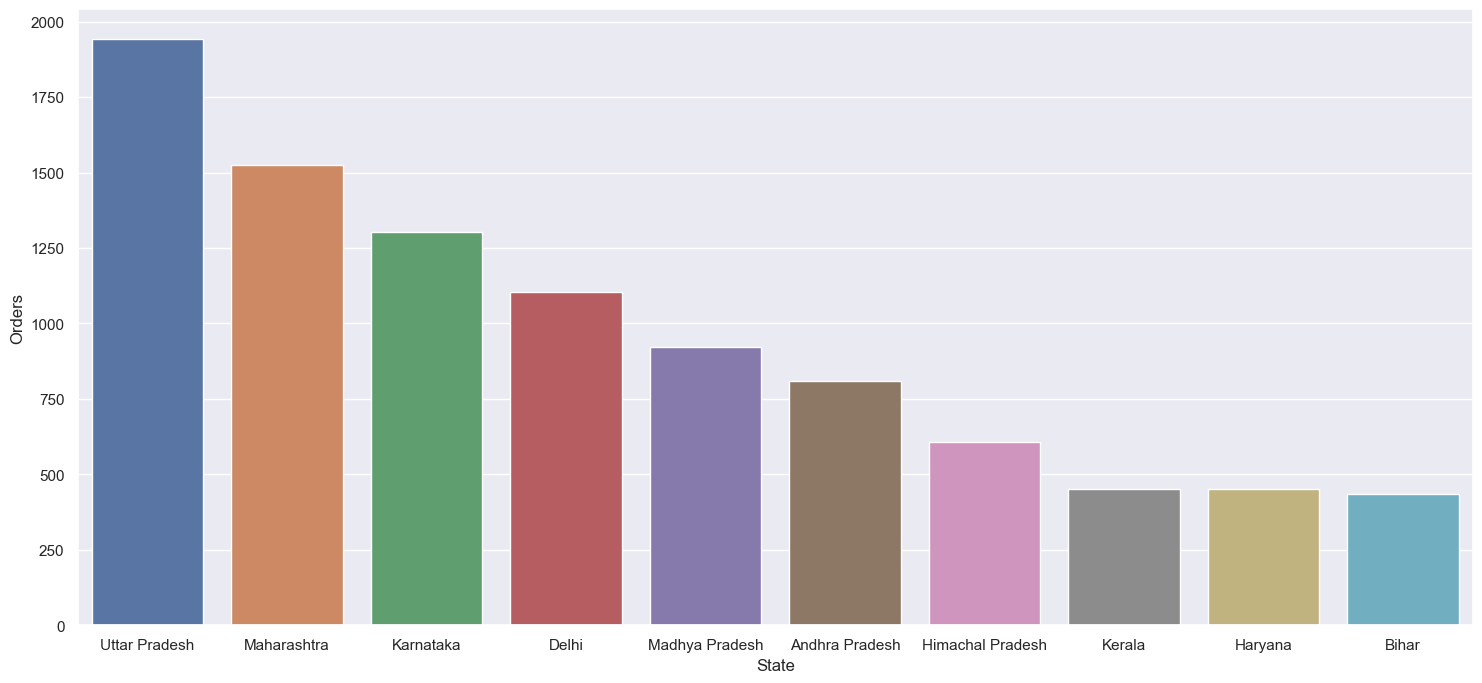

In [26]:
sns.set(rc = {'figure.figsize':(18,8)}) # modifying the plot size , so that all the names of the states are visible
order_state_chart = sns.barplot(data = orders_per_state,x = 'State',y = 'Orders')

In [27]:
# top 10 states with highest sales
sales_by_state = df.groupby('State')['Amount'].sum().reset_index().sort_values(by = 'Amount',ascending = False).head(10)
sales_by_state

,State,Amount
14,Uttar Pradesh,19374968
10,Maharashtra,14427543
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142
0,Andhra Pradesh,8037146
5,Himachal Pradesh,4963368
4,Haryana,4220175
1,Bihar,4022757
3,Gujarat,3946082


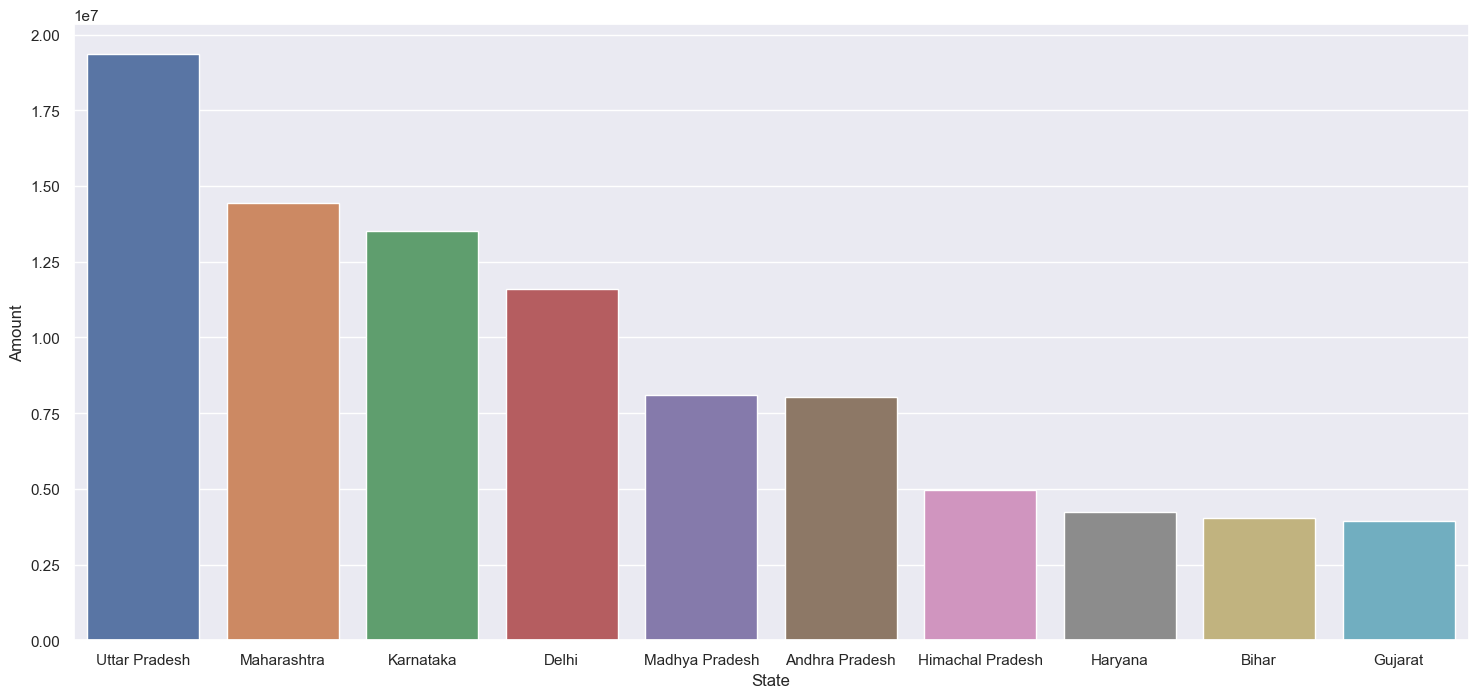

In [28]:
sales_state_chart = sns.barplot(data = sales_by_state,x = 'State', y = 'Amount')

From the above graphs we can see most of the orders are from Uttar pradesh, Maharastra and Karnataka.

And one more interesting thing is even tough Kerala is present in top 10 states with highest number of order but it is not present in the top 10 states with highest sales amount.

### Marital Status
0 >>> Unmarried

1 >>> Married

In [29]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

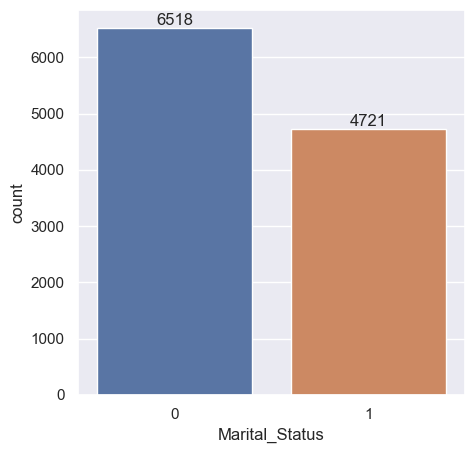

In [30]:
sns.set(rc = {'figure.figsize' : (5,5)})
ms = sns.countplot(data = df, x= 'Marital_Status')
for cnt in ms.containers:
    ms.bar_label(cnt)

In [31]:
sales_by_marital_status = df.groupby(['Marital_Status','Gender'])['Amount'].sum().reset_index()
sales_by_marital_status

,Marital_Status,Gender,Amount
0,0,F,43786646
1,0,M,18338738
2,1,F,30549207
3,1,M,13574538


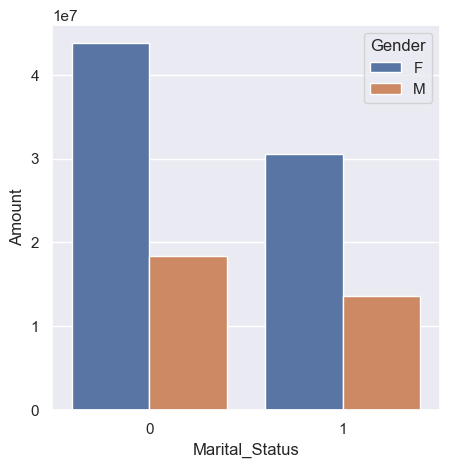

In [32]:
sales_ms_chart = sns.barplot(data = sales_by_marital_status,x = 'Marital_Status',y = 'Amount',hue = 'Gender')

From the above graph we can see that most of the buyers are unmarried women.

### Occupation

In [33]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

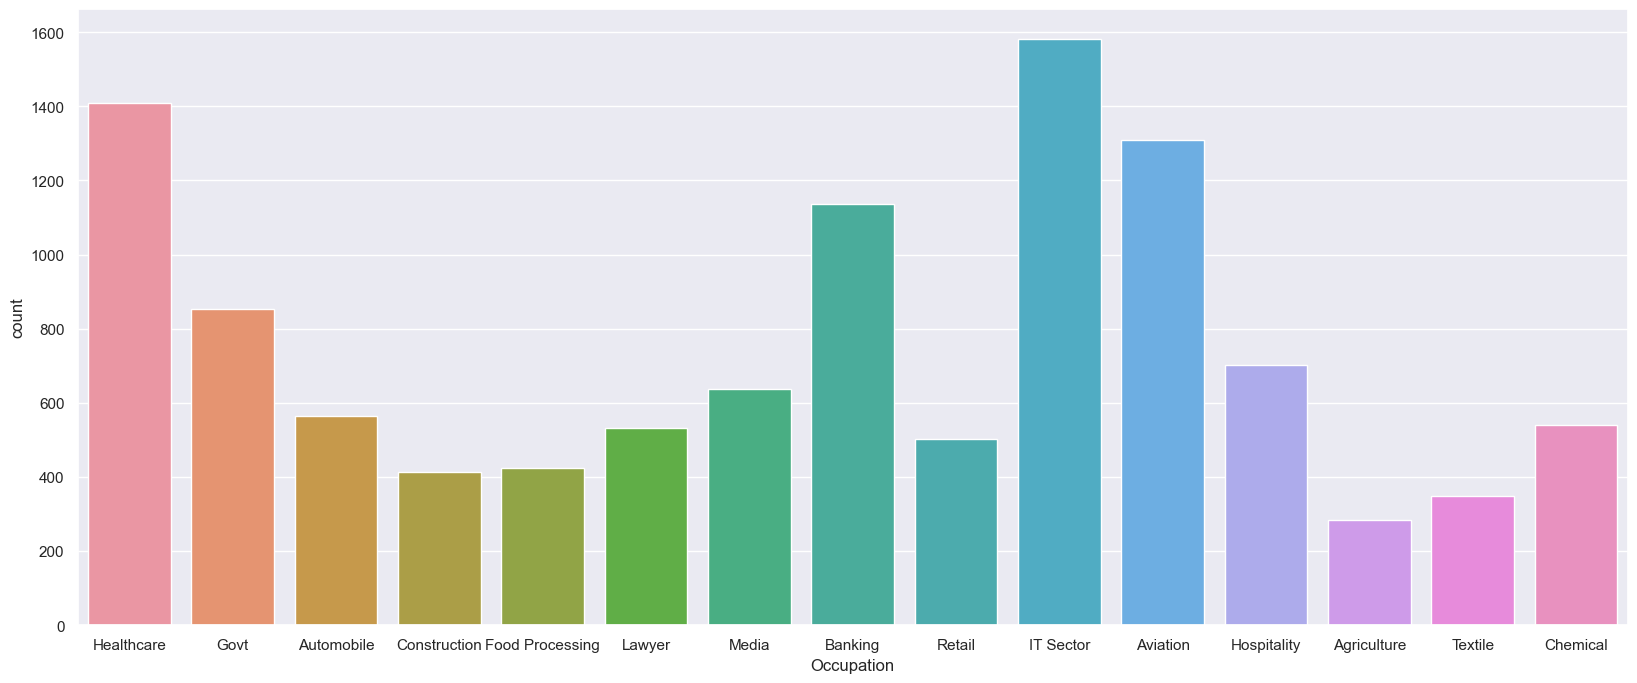

In [34]:
sns.set(rc = {'figure.figsize':(20,8)})
cnt_by_occup = sns.countplot(data = df , x = 'Occupation')

In [35]:
# Top 10 occupations with highest sales 
sales_by_occupation = df.groupby('Occupation')['Amount'].sum().reset_index().sort_values(by = 'Amount',ascending = False).head(10)
sales_by_occupation

,Occupation,Amount
10,IT Sector,14755079
8,Healthcare,13034586
2,Aviation,12602298
3,Banking,10770610
7,Govt,8517212
9,Hospitality,6376405
12,Media,6295832
1,Automobile,5368596
4,Chemical,5297436
11,Lawyer,4981665


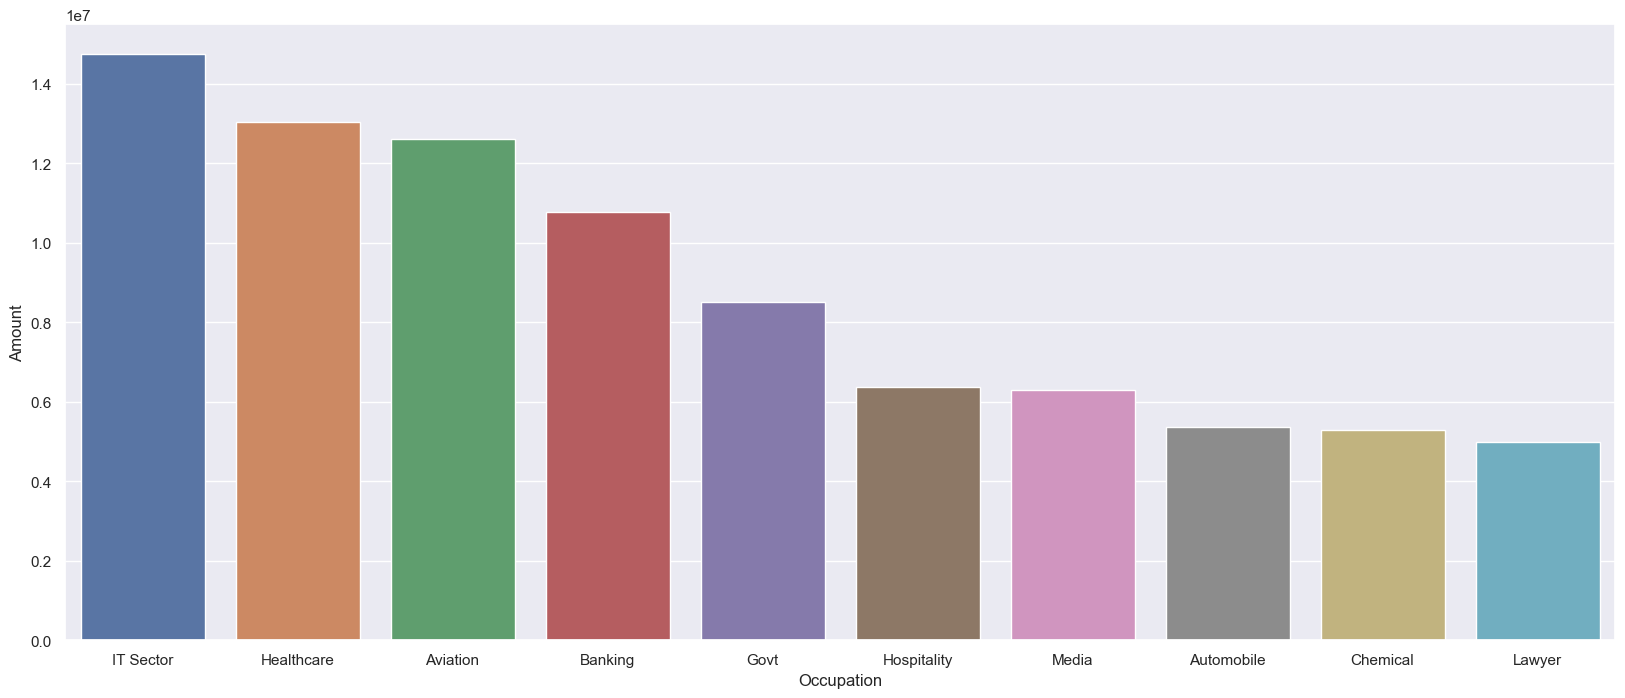

In [36]:
sale_occup_chart = sns.barplot(data = sales_by_occupation, x = 'Occupation', y = 'Amount')

From the above graph we can see that most of the buyers are working in IT, Healthcare and Aviation sector

### Product Category

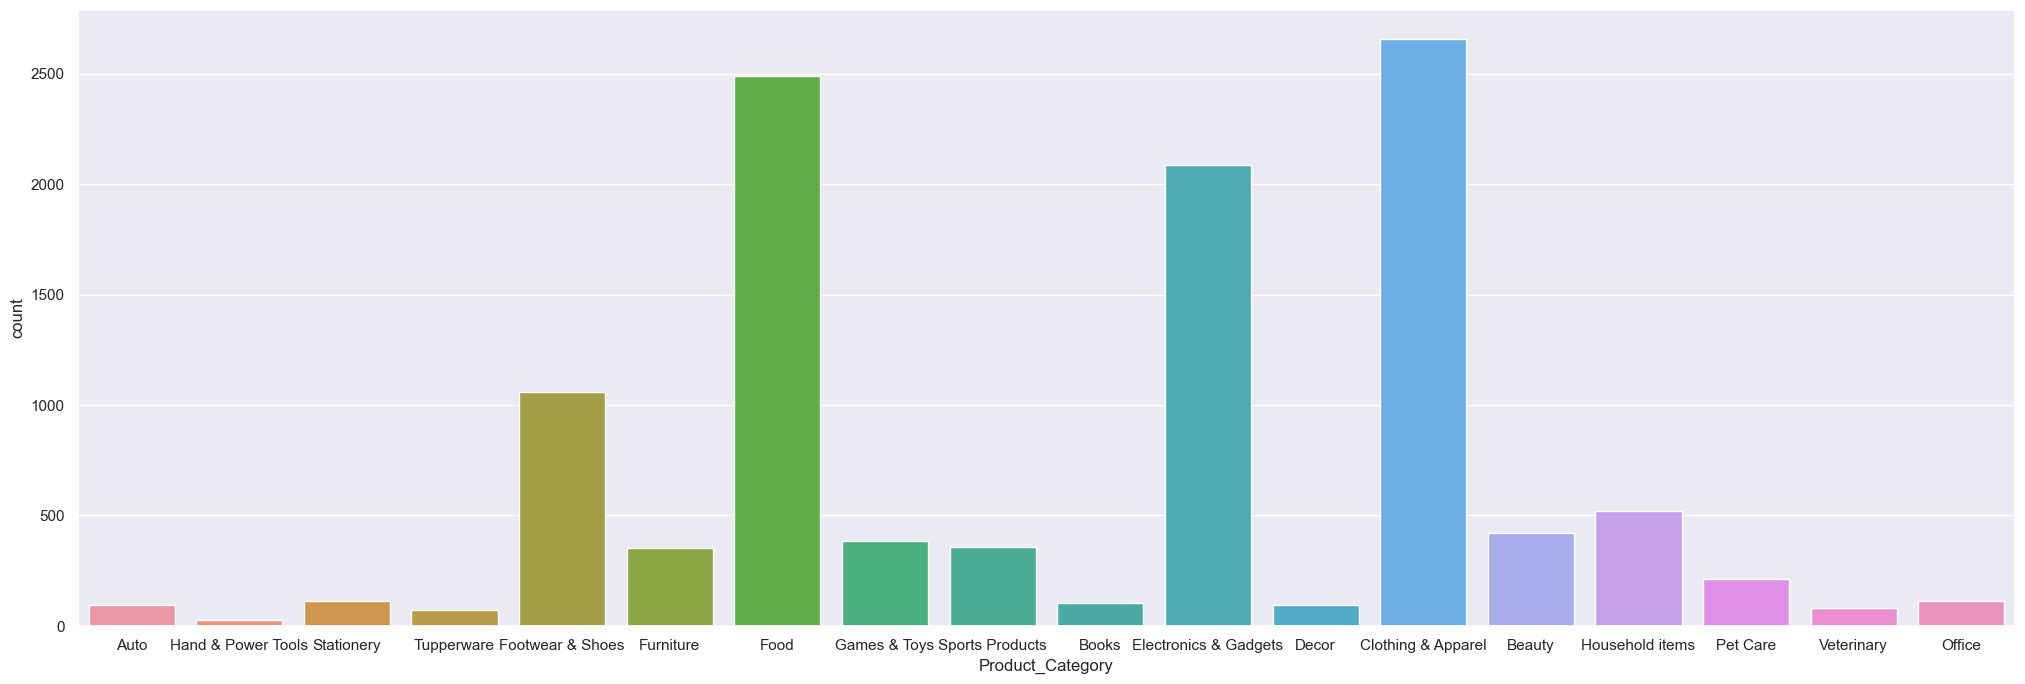

In [37]:
sns.set(rc = {'figure.figsize':(25,8)})
prod_cat_count = sns.countplot(data = df, x = 'Product_Category')

In [38]:
#top 10 product categories with highest sales
sales_by_prod_category = df.groupby('Product_Category')['Amount'].sum().reset_index().sort_values(by='Amount', ascending = False).head(10)
sales_by_prod_category

,Product_Category,Amount
6,Food,33933883
3,Clothing & Apparel,16495019
5,Electronics & Gadgets,15643846
7,Footwear & Shoes,15575209
8,Furniture,5440051
9,Games & Toys,4331694
14,Sports Products,3635933
1,Beauty,1959484
0,Auto,1958609
15,Stationery,1676051


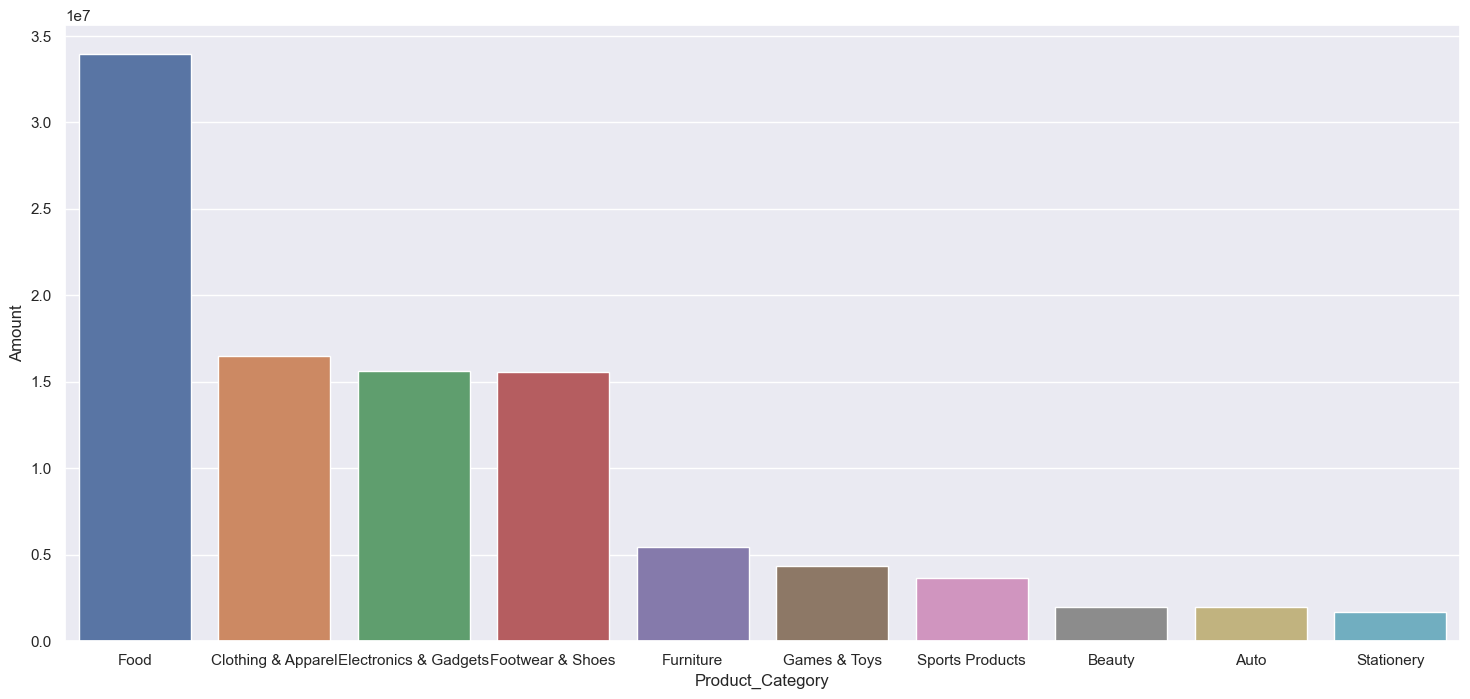

In [39]:
sns.set(rc = {'figure.figsize':(18,8)})
sale_pc_chart = sns.barplot(data = sales_by_prod_category,x = 'Product_Category', y = 'Amount')

From the above graph we can see people have spent more money on Food, Clothing and Electronis

# Thank you